In [2]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

In [3]:
df = pd.read_csv("selfie_id.csv")

In [4]:
df.shape

(435, 6)

In [5]:
df.head()
# all_faces/0001ca9b9a--61aa90111e37d6183d870ea5_ID_2.jpg
# "all_faces/0001cc1e1e--61af8513667cba1b47349869_Selfie_6.jpg"

,SetId,UserRace,Age,Name,FName,URL
0,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,ID_1.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...
1,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,ID_2.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...
2,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_1.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...
3,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_10.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...
4,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_11.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...


In [21]:
df['NewPath'] = "all_faces/"+df["SetId"]+"_"+df["FName"]


In [22]:
df.head()

,SetId,UserRace,Age,Name,FName,URL,NewPath
0,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,ID_1.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...,all_faces/0001cc1e1e--61af8513667cba1b47349869...
1,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,ID_2.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...,all_faces/0001cc1e1e--61af8513667cba1b47349869...
2,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_1.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...,all_faces/0001cc1e1e--61af8513667cba1b47349869...
3,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_10.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...,all_faces/0001cc1e1e--61af8513667cba1b47349869...
4,0001cc1e1e--61af8513667cba1b47349869,Hispanic,25,Weslley,Selfie_11.jpg,0001cc1e1e--61af8513667cba1b47349869_age_25_na...,all_faces/0001cc1e1e--61af8513667cba1b47349869...


In [27]:
df = df[df['NewPath'].apply(lambda path: os.path.exists(path))]


In [28]:
df.shape

(315, 7)

In [29]:
df['Name'].value_counts()

Name
Weslley       15
Klara         15
Mark          15
Alessandro    15
Vitalijs      15
Mykhailo      15
Kateryna      15
Anna          15
Ewa           15
Diego         15
Miia          15
Juliana       15
Paolo         15
Clarissa      15
Gabriel       15
Bruno         15
Alejandra     15
Daiane        15
Fernanda      15
Rayanne       15
Kasia         15
Name: count, dtype: int64

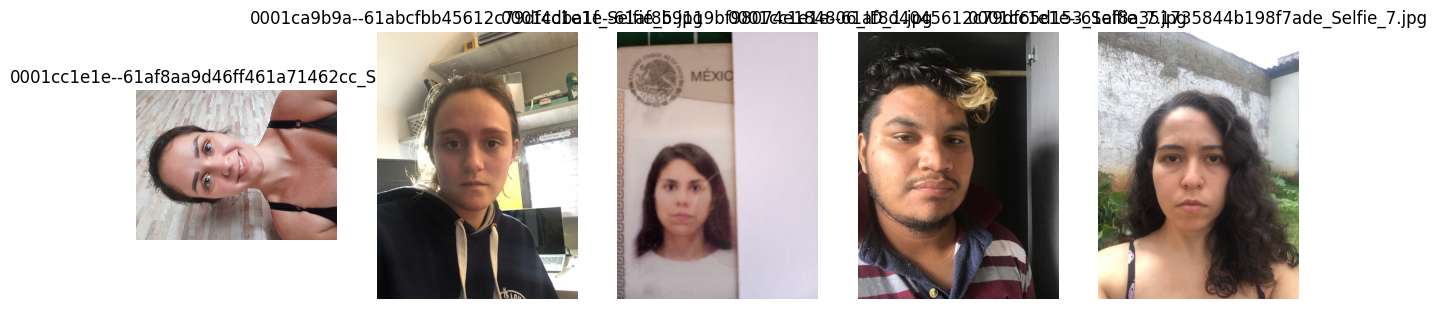

In [30]:
sample_paths = df["NewPath"].sample(5).tolist()  # Pick 5 random images
# Display the images
fig, axes = plt.subplots(1, len(sample_paths), figsize=(15, 5))

for ax, img_path in zip(axes, sample_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(img_path.split("/")[-1])  # Show filename

plt.show()

In [32]:
df.to_csv("modified.csv", index=False)

In [44]:
# Using Facenet to Embed Images into Vectors
from keras_facenet import FaceNet

# Load the pre-trained FaceNet model
embedder = FaceNet()

In [45]:
# Extracting the Face Embeddings
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to extract embeddings for all images
def get_embeddings(image_paths):
    embeddings = []
    for path in image_paths:
        img = load_img(path, target_size=(160, 160))  # Resize to 160x160
        img = img_to_array(img) / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Expand dimensions
        embedding = embedder.embeddings(img)  # Get FaceNet embedding
        embeddings.append(embedding[0])
    return np.array(embeddings)

# Apply to dataset
X = get_embeddings(df["NewPath"].tolist())  # Convert all images to embeddings
y = df["Name"].values  # Labels

In [1]:
df.head()

NameError: name 'df' is not defined